# MODELOS DE CATEGORIZACION

## 1. Introducción


In [1]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm


In [2]:
data = pd.read_pickle("clean_data/track.pkl")
unpickled_df_features = pd.read_pickle("clean_data/features.pkl")



(Copiado de Data Analysis)

### Analisis de Features

Los features fueron generados utilizando la libreria de librosa sobre mp3 de extractos de cada cancion.

(Del data esta es la primera agrupacion)

Los features generados son:
- mfcc: Mel-frequency cepstral coefficients (MFCCs). The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

- chroma_cens: Computes the chroma variant “Chroma Energy Normalized” (CENS). CENS features are robust to dynamics, timbre and articulation, thus these are commonly used in audio matching and retrieval applications. Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.


- tonnetz: Tonal centroid features (tonnetz). This representation uses the method to project chroma features onto a 6-dimensional basis representing the perfect fifth, minor third, and major third each as two-dimensional coordinates.

- spectral_contrast: Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise. 

- spectral_centroid: Each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame.It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

- spectral_bandwidth: Compute p’th-order spectral bandwidth.

- spectral_rolloff: The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

- rmse: Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.

- zcr: Zero-crossing rate of an audio time series -> The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

Para mas informacion sobre cada feature: [Librosa features](https://librosa.org/doc/main/feature.html#)


Spectrogram
A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time.

Para cada feature se calcula:
- kurtosis
- max
- mean
- median
- min
- skew
- std

# Conclusion:

- zcr: Me interesa quedarme con esto ya que categoriza al metal y rock
- spectral_centroid: el centro de masa del sonido, en metal esta sobre el final y en blues en medio
- spectral rolloff: Es una medida de la señal que represental la frecuencia por debajo de el total spectral enegergy 
- mfcc: modelo de voz humana
- chroma: representacion poderosa del audio

we will choose 5 features, i.e. Mel-Frequency Cepstral Coefficients, Spectral Centroid, Zero Crossing Rate, Chroma Frequencies, Spectral Roll-off.


	filename	chroma_stft	rmse	spectral_centroid	spectral_bandwidth	rolloff	zero_crossing_rate	mfcc1	mfcc2	mfcc3	...	mfcc12	mfcc13	mfcc14	mfcc15	mfcc16	mfcc17	mfcc18	mfcc19	mfcc20	label

## Feature extraction 

In [3]:
unpickled_df_features.head(5).style.format('{:.2f}')

In [4]:
features_columns = ['mfcc', 'chroma_cens', 'spectral_centroid',"spectral_bandwidth", 'spectral_rolloff', "zcr"]

clean_features = unpickled_df_features[features_columns]
clean_features.shape

(9355, 252)

In [5]:
clean_features_spectral_centroid= unpickled_df_features["spectral_centroid"]["mean"]
print(clean_features_spectral_centroid.head())
clean_features_spectral_centroid = clean_features_spectral_centroid.rename(columns={"01":"spectral_centroid"})

clean_features_spectral_bandwidth = unpickled_df_features["spectral_bandwidth"]["mean"]
print(clean_features_spectral_bandwidth.head())
clean_features_spectral_bandwidth = clean_features_spectral_bandwidth.rename(columns={"01":"spectral_bandwidth"})


clean_features_spectral_rolloff = unpickled_df_features["spectral_rolloff"]["mean"]
print(clean_features_spectral_rolloff.head())
clean_features_spectral_rolloff = clean_features_spectral_rolloff.rename(columns={"01":"spectral_rolloff"})

clean_features_zcr = unpickled_df_features["zcr"]["mean"]
print(clean_features_zcr.head())
clean_features_zcr = clean_features_zcr.rename(columns={"01":"zcr"})

clean_features_mfcc = unpickled_df_features["mfcc"]["mean"]
clean_features_mfcc_mean =clean_features_mfcc.mean(axis=1)
print(clean_features_mfcc_mean.head())
#clean_features_spectral_rolloff = clean_features_spectral_rolloff.rename(columns={"0":"mfcc"})


clean_features_chroma_cens= unpickled_df_features["chroma_cens"]["mean"]
clean_features_chroma_cens_mean=clean_features_chroma_cens.mean(axis=1)
print(clean_features_chroma_cens_mean.head())
#clean_features_chroma_cens_mean = clean_features_chroma_cens_mean.rename(columns={"0":"chroma"})


number             01
track_id             
2         1639.583252
3         1763.012451
5         1292.958130
10        1360.028687
134       1257.696289
number             01
track_id             
2         1607.474365
3         1736.961426
5         1512.917358
10        1420.259644
134       1314.968628
number             01
track_id             
2         3267.804688
3         3514.619629
5         2773.931885
10        2603.491943
134       2462.616943
number          01
track_id          
2         0.085629
3         0.084578
5         0.053114
10        0.077515
134       0.064370
track_id
2     -3.591958
3      0.090657
5     -1.035142
10    -1.003117
134   -1.473439
dtype: float64
track_id
2      0.260277
3      0.266892
5      0.265505
10     0.270363
134    0.258546
dtype: float64


In [6]:
clean_features = pd.concat([clean_features_spectral_rolloff, clean_features_spectral_bandwidth, clean_features_spectral_centroid, clean_features_zcr, clean_features_mfcc_mean, clean_features_chroma_cens_mean  ], axis=1, join='inner')
features = clean_features.rename(columns={0: "mfcc",1:"chroma" })

print(features.columns)


Index(['spectral_rolloff', 'spectral_bandwidth', 'spectral_centroid', 'zcr',
       'mfcc', 'chroma'],
      dtype='object')


In [7]:
data_full = pd.concat([data, features], axis=1, join='inner')


In [8]:
data_full.shape

(9355, 22)

In [9]:
data=data_full


##  Preparamos los datos del modelo

In [10]:
from matplotlib import offsetbox
import joblib
#from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt


Observamos la media y varianza de las variables:

In [11]:
#Obtenemos las variables numericas del data:
print (data.columns)
print(data.info())

#dropeo location porque tiene muchos nulos 
data_complete = data_full.drop(labels="location",axis=1)

print("Media de las variables: ")
print(data_complete.mean(axis=0))

print('\n')


print("Varianza de las variables: ")
print(data_complete.var(axis=0))


Index(['date_created', 'duration', 'genre_top', 'title', 'album',
       'album_tracks', 'artist', 'location', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'valence', 'spectral_rolloff', 'spectral_bandwidth',
       'spectral_centroid', 'zcr', 'mfcc', 'chroma'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9355 entries, 2 to 124722
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_created        9355 non-null   datetime64[ns]
 1   duration            9355 non-null   int64         
 2   genre_top           9355 non-null   category      
 3   title               9354 non-null   object        
 4   album               9355 non-null   object        
 5   album_tracks        9355 non-null   int64         
 6   artist              9355 non-null   object        
 7   location            6327 non-n

In [12]:
print (data_complete.columns)

Index(['date_created', 'duration', 'genre_top', 'title', 'album',
       'album_tracks', 'artist', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'spectral_rolloff', 'spectral_bandwidth', 'spectral_centroid', 'zcr',
       'mfcc', 'chroma'],
      dtype='object')


In [55]:
#Armo una lista de numericas para depsues hacer el fit transform en estas
lista_numero=["duration", "acousticness","album_tracks", "danceability","energy","instrumentalness", "liveness",  "speechiness","tempo","valence",'spectral_rolloff', 'spectral_bandwidth', 'spectral_centroid', 'zcr',
       'mfcc', 'chroma']

data_complete=data_complete[lista_numero]

In [14]:
# El argumento stratify nos permite generar una división que respeta la misma proporción entre clases en ambos sets

X = data_complete
Y = data['genre_top']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1237, stratify= Y)

#tengo qeu hacer un stratidfy aca para qeu en la division de train test tenga las mismo porcentaje de varialbes)

In [15]:
display(Y_train.value_counts(normalize=True).round(2))

display(Y_test.value_counts(normalize=True).round(2))

Rock                   0.42
Electronic             0.23
Hip-Hop                0.10
Folk                   0.09
Old-Time / Historic    0.04
Pop                    0.04
Classical              0.03
Jazz                   0.03
International          0.01
Instrumental           0.01
Blues                  0.01
Experimental           0.00
Spoken                 0.00
Soul-RnB               0.00
Easy Listening         0.00
Country                0.00
Name: genre_top, dtype: float64

Rock                   0.42
Electronic             0.23
Hip-Hop                0.10
Folk                   0.09
Old-Time / Historic    0.04
Pop                    0.04
Classical              0.03
Jazz                   0.03
International          0.01
Instrumental           0.01
Blues                  0.01
Experimental           0.00
Spoken                 0.00
Soul-RnB               0.00
Easy Listening         0.00
Country                0.00
Name: genre_top, dtype: float64

In [16]:
#Es necesario llevar a la misma escala, porque sino la que tiene mayor varianza va a pesar mas en PCA. Por eso normalizamos los datos
#en un modelo no hacemos en el test el fit_transform, solo hacemos transform. Porque ya tenemos la informacion de la media y varianza en el fit del train.


std_sclr = StandardScaler()
std_sclr_trained = std_sclr.fit(X_train)
X_train_numerical = std_sclr_trained.transform(X_train)
X_train_numerical_scaled = pd.DataFrame(X_train_numerical, columns = lista_numero)
X_train_numerical_scaled.head()

,duration,acousticness,album_tracks,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,spectral_rolloff,spectral_bandwidth,spectral_centroid,zcr,mfcc,chroma
0,0.883850,-1.309412,-0.635518,0.348492,0.511400,0.652860,-0.495151,-0.469219,-0.371331,-1.083089,0.010346,-0.234745,-0.126406,-0.357563,1.191108,-0.354475
1,-0.177243,-0.055801,0.243062,-0.025583,0.140224,0.846950,-0.604525,-0.522437,0.757069,0.263408,-1.090291,-1.182832,-1.188995,-1.006818,1.098490,-0.875243
2,-0.333945,-0.915332,-0.811233,0.473132,0.074013,-0.127887,-0.688615,-0.361767,-1.034467,0.492099,-0.388755,-0.497772,-0.489911,-0.423248,0.914365,0.325666
3,-0.575713,1.123642,-0.459802,-1.199457,0.007354,0.690715,-0.294928,-0.498345,0.590553,-1.176920,-0.298324,-0.599189,-0.120580,0.782672,-0.450799,-0.655591
4,0.203318,1.146295,-0.371944,-2.139906,-1.851485,0.650356,-0.580610,-0.382172,1.960818,-1.459822,-1.546564,-1.681849,-1.508697,-0.894534,-0.951630,-2.303330


In [17]:
X_test_numerical = std_sclr_trained.transform(X_test)
X_test_numerical_scaled = pd.DataFrame(X_test_numerical, columns = lista_numero)
X_test_numerical_scaled.head()

,duration,acousticness,album_tracks,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,spectral_rolloff,spectral_bandwidth,spectral_centroid,zcr,mfcc,chroma
0,-0.575713,-1.335604,-0.196228,0.916627,1.216793,0.702406,1.617690,-0.418569,-0.484143,0.955626,0.512909,0.354262,0.731809,1.047554,0.187109,1.059817
1,-0.616008,1.144133,-0.196228,-0.651491,0.135588,0.667621,-0.521252,-0.490780,1.093816,1.866523,-0.291733,-0.052231,-0.439667,-0.600403,-0.490170,0.956819
2,0.677900,1.197086,-0.547660,-0.413752,-1.809018,0.772283,-0.660750,-0.438767,0.053656,-0.818154,-1.826825,-2.300483,-1.826683,-1.128882,-2.086705,-0.959051
3,-0.396625,0.397773,-0.547660,2.168938,-0.912599,-1.816150,-0.822690,-0.297518,-0.512318,1.207421,-0.670948,-0.326874,-0.717759,-0.752118,-0.686674,-0.173233
4,-0.539895,-0.562306,-1.162665,0.398542,1.488497,0.692821,-0.219461,-0.315968,0.050475,0.896122,2.431357,2.653074,2.023643,0.181115,1.160937,0.606025


In [18]:
print("Media de las variables: ")
print(X_train_numerical_scaled.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables: como normalizamos la varianza es 1
print("Varianza de las variables: ")
print(X_train_numerical_scaled.var(axis=0))

Media de las variables: 
duration              2.054668e-17
acousticness          8.022849e-17
album_tracks          5.641946e-16
danceability          2.689316e-16
energy                6.707861e-17
instrumentalness     -2.376314e-16
liveness              1.595708e-16
speechiness          -1.208808e-16
tempo                 2.483364e-16
valence               2.045747e-16
spectral_rolloff     -1.985932e-16
spectral_bandwidth    2.344191e-16
spectral_centroid     4.954861e-16
zcr                  -4.218721e-17
mfcc                 -2.156437e-17
chroma                1.941324e-16
dtype: float64


Varianza de las variables: 
duration              1.000143
acousticness          1.000143
album_tracks          1.000143
danceability          1.000143
energy                1.000143
instrumentalness      1.000143
liveness              1.000143
speechiness           1.000143
tempo                 1.000143
valence               1.000143
spectral_rolloff      1.000143
spectral_bandwidth    1.00014

### Features del modelo
X_test_numerical_scaled / X_train_numerical_scaled / Y_train, Y_test


## 1. Reduccion de dimensionalidad -> PCA

In [19]:
model_pca = PCA().fit(X_train_numerical_scaled)

X_train_PCA = model_pca.transform(X_train_numerical_scaled)
X_test_PCA = model_pca.transform(X_test_numerical_scaled)

componentes=model_pca.n_components_
print("Componentes del modelo", model_pca.n_components_)

Componentes del modelo 16


In [20]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

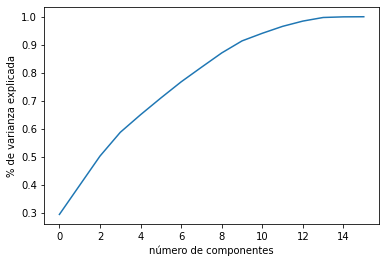

In [21]:
plot_explained_variance(components_count = componentes, X = X_train_numerical_scaled)

## PCA para features musicales

In [22]:
lista_features=['spectral_rolloff', 'spectral_bandwidth', 'spectral_centroid', 'zcr', 'mfcc', 'chroma' ]


In [23]:
std_sclr = StandardScaler()
std_sclr_trained = std_sclr.fit(X_train[lista_features])
X_train_numerical = std_sclr_trained.transform(X_train[lista_features])
X_train_numerical_scaled = pd.DataFrame(X_train_numerical, columns = lista_features)
X_train_numerical_scaled.head()

,spectral_rolloff,spectral_bandwidth,spectral_centroid,zcr,mfcc,chroma
0,0.010346,-0.234745,-0.126406,-0.357563,1.191108,-0.354475
1,-1.090291,-1.182832,-1.188995,-1.006818,1.098490,-0.875243
2,-0.388755,-0.497772,-0.489911,-0.423248,0.914365,0.325666
3,-0.298324,-0.599189,-0.120580,0.782672,-0.450799,-0.655591
4,-1.546564,-1.681849,-1.508697,-0.894534,-0.951630,-2.303330


In [24]:
X_test_numerical = std_sclr_trained.transform(X_test[lista_features])
X_test_numerical_scaled = pd.DataFrame(X_test_numerical, columns = lista_features)
X_test_numerical_scaled.head()

,spectral_rolloff,spectral_bandwidth,spectral_centroid,zcr,mfcc,chroma
0,0.512909,0.354262,0.731809,1.047554,0.187109,1.059817
1,-0.291733,-0.052231,-0.439667,-0.600403,-0.490170,0.956819
2,-1.826825,-2.300483,-1.826683,-1.128882,-2.086705,-0.959051
3,-0.670948,-0.326874,-0.717759,-0.752118,-0.686674,-0.173233
4,2.431357,2.653074,2.023643,0.181115,1.160937,0.606025


In [25]:
model_pca = PCA().fit(X_train_numerical_scaled)

X_train_PCA = model_pca.transform(X_train_numerical_scaled)
X_test_PCA = model_pca.transform(X_test_numerical_scaled)

componentes=model_pca.n_components_
print("Componentes del modelo", model_pca.n_components_)

Componentes del modelo 6


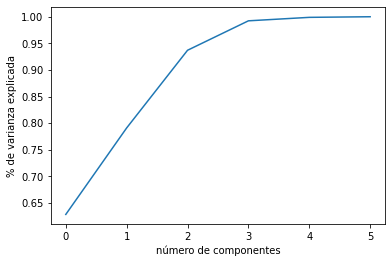

In [26]:
plot_explained_variance(components_count = componentes, X = X_train_numerical_scaled)

con la regla del codo notamos que con 3 variables de PCA podemos explicar más de 95% y con 2 podemos explicar el 95%

## Representacion grafica con 2 variables

In [27]:
pca_digits_vis = PCA(n_components=2)
data_numero = pca_digits_vis.fit_transform(data_complete[lista_features])
print(data_complete[lista_features].shape)
print(data_numero.shape)

(9355, 6)
(9355, 2)


In [28]:
def plot_digits_pca(projection, generos):
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())

    for i in range(len(projection)):
        plt.xlabel('Primer Componente Principal')
        plt.ylabel('Segundo Componente Principal')
        plt.scatter(projection[i,0], projection[i,1], s=10) #color=color[genero[i]]
        
#No pude conectar un color con un genero distinto 

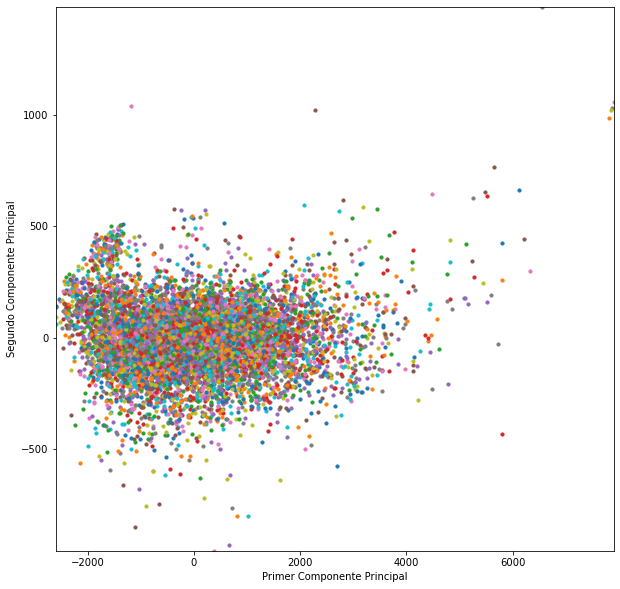

In [29]:
plot_digits_pca(data_numero, data.genre_top)

# 2. NAIVE BAYES

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
gnb = GaussianNB()

gnb.fit(X_train_numerical_scaled, Y_train)

GaussianNB()

In [59]:
Y_pred = gnb.predict(X_test_numerical_scaled)

Y_pred

array(['Rock', 'Rock', 'Classical', ..., 'Rock', 'Electronic', 'Rock'],
      dtype='<U19')

In [60]:
round(accuracy_score(Y_test, Y_pred), 2)

0.52

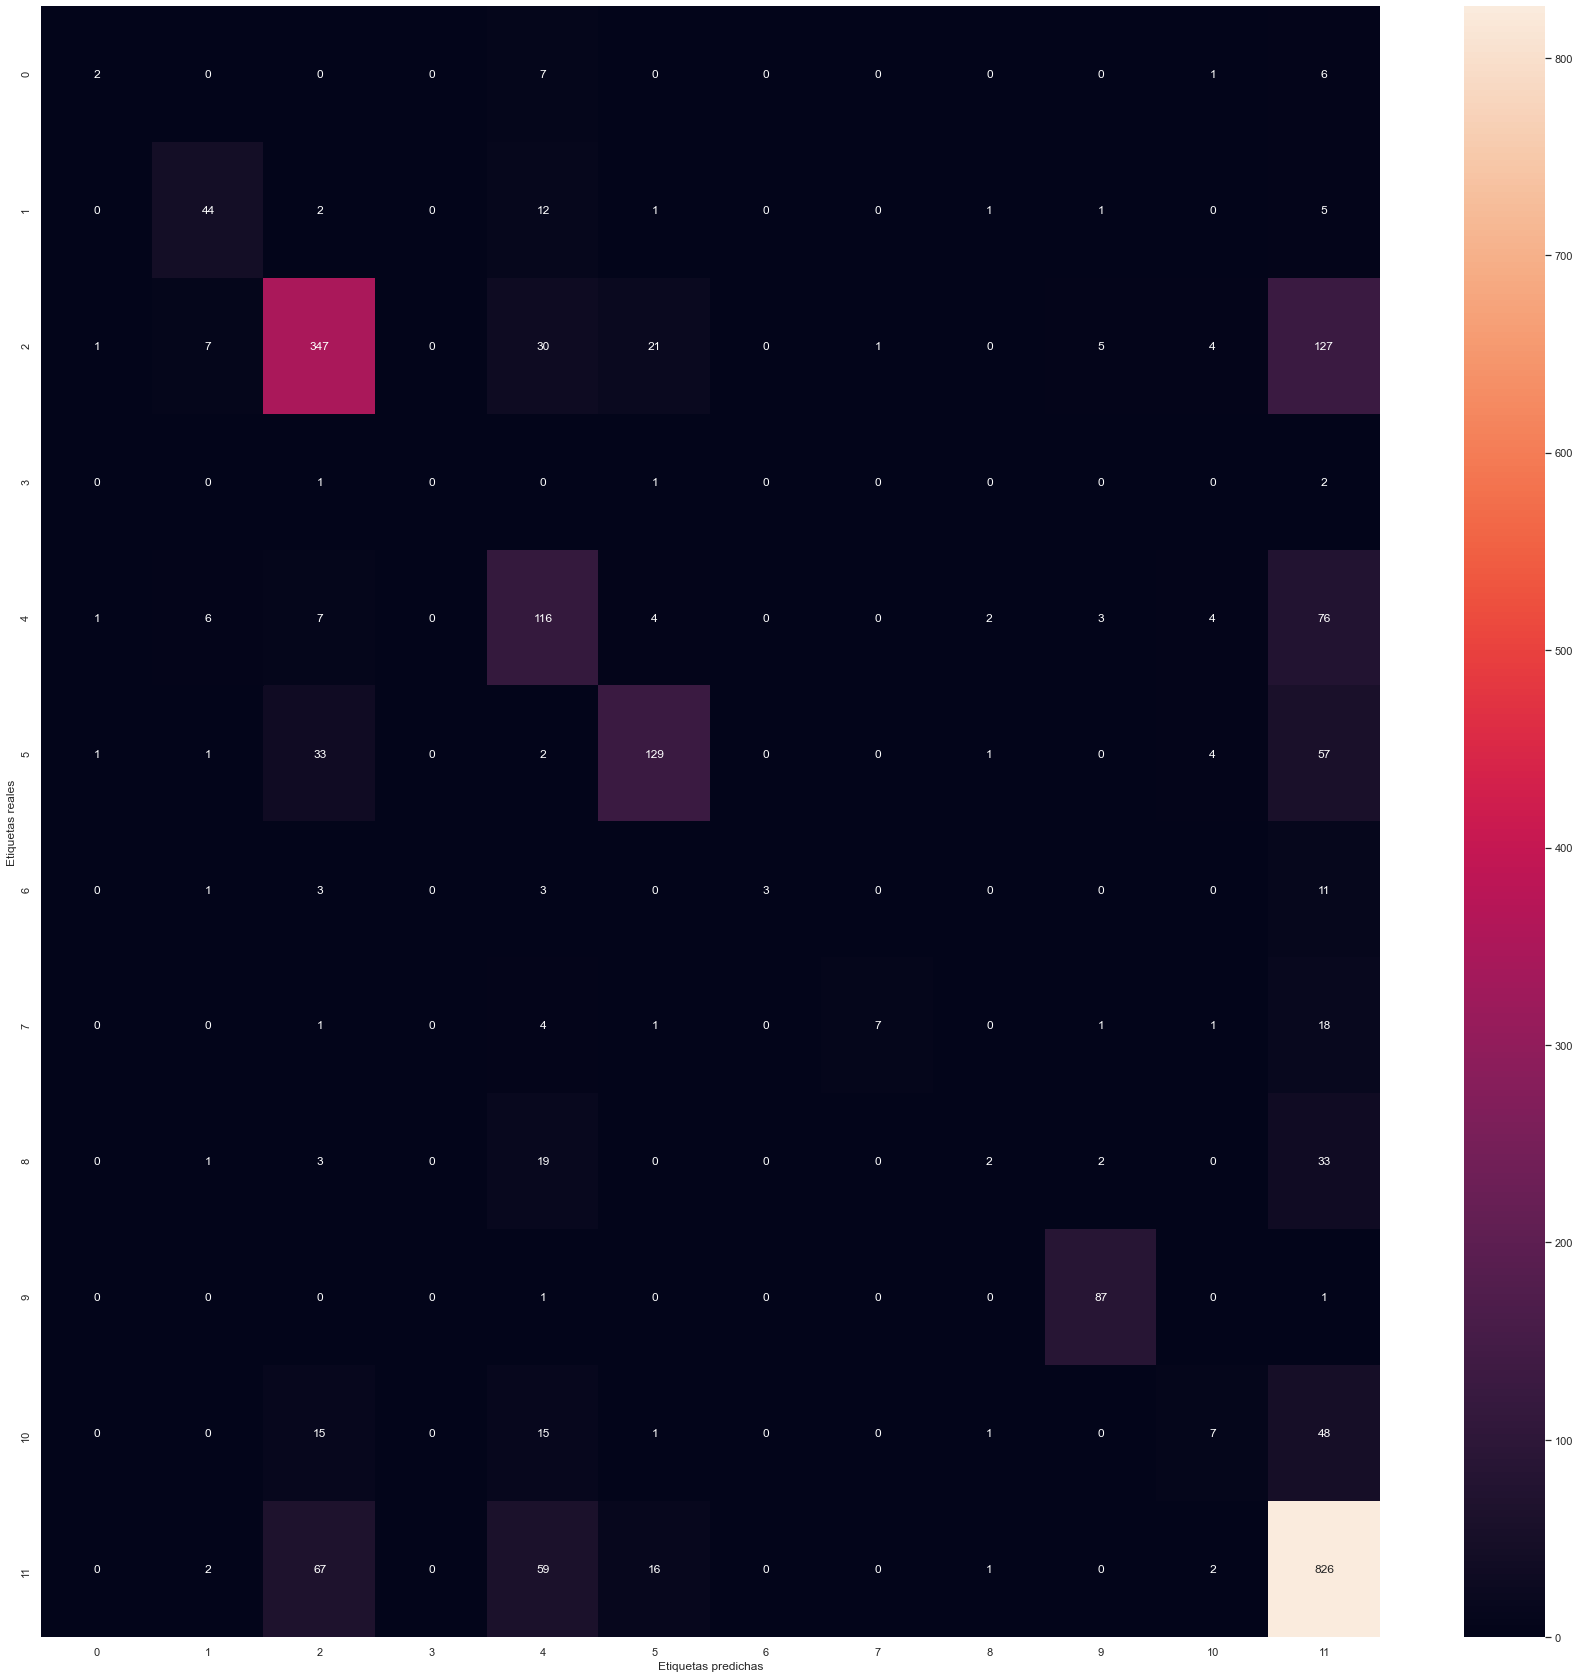

In [62]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


## 3. KNN

In [30]:
# Importamos la clase KNeighborsClassifier de módulo neighbors
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred).round(2)

0.47

In [35]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=12, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 21):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, Y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [36]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,score_medio,score_std,n_neighbors
0,0.411631,0.017530,1
1,0.368588,0.019973,2
2,0.442989,0.014852,3
3,0.464509,0.014906,4
4,0.477054,0.011724,5


In [37]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.411631,0.017530,1,0.394100,0.429161
1,0.368588,0.019973,2,0.348614,0.388561
2,0.442989,0.014852,3,0.428138,0.457841
3,0.464509,0.014906,4,0.449603,0.479416
4,0.477054,0.011724,5,0.465331,0.488778


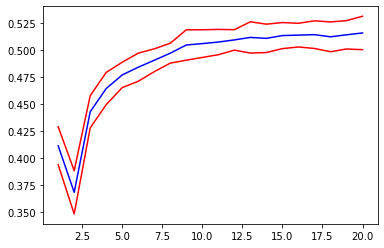

In [38]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color='r');

In [39]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
19,0.515828,0.01544,20,0.500388,0.531269


In [40]:
# Utilizamos sklearn para estandarizar la matriz de features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0.  0. -0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0.  0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [42]:
# Calculamos nuevamente los scores de cross validation,
# pero esta vez sobre los features estandarizados:

scores_para_df_standard = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, Y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

In [43]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores_standard = pd.DataFrame(scores_para_df_standard)
df_scores_standard.head()

,score_medio,score_std,n_neighbors
0,0.610602,0.015479,1
1,0.591785,0.017139,2
2,0.639109,0.017078,3
3,0.653793,0.016404,4
4,0.656783,0.011676,5


,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
10,0.669187,0.011958,11,0.681144,0.657229


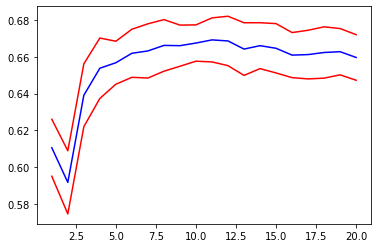

In [44]:
df_scores_standard['limite_superior'] = df_scores_standard['score_medio'] + df_scores_standard['score_std']
df_scores_standard['limite_inferior'] = df_scores_standard['score_medio'] - df_scores_standard['score_std']
df_scores_standard.head()

# Graficamos los resultados
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_inferior'], color='r')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['score_medio'], color='b')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_superior'], color='r');
# Identificamos el score máximo
df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max()]

In [45]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max(), 'n_neighbors'].values[0]
best_k

11

In [46]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [47]:
#Evaluamos qué accuracy obtenemos en train
accuracy_score(Y_train, model.predict(X_train)).round(2)

0.72

In [48]:
# Lo utilizamos para predecir en test
X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test con las medias y desvíos aprendidos en train!
y_pred = model.predict(X_test)

In [49]:
# Evaluamos el accuracy del modelo en test
accuracy_score(Y_test, y_pred).round(2)

0.67

### KNN con 11 neighbors -> El modelo esta under fiteando
- Acurr en train -> 0.72 

- Acurr en test -> 0.67

In [50]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[  2,   0,   0,   0,   7,   0,   0,   0,   0,   0,   1,   6],
       [  0,  44,   2,   0,  12,   1,   0,   0,   1,   1,   0,   5],
       [  1,   7, 347,   0,  30,  21,   0,   1,   0,   5,   4, 127],
       [  0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   2],
       [  1,   6,   7,   0, 116,   4,   0,   0,   2,   3,   4,  76],
       [  1,   1,  33,   0,   2, 129,   0,   0,   1,   0,   4,  57],
       [  0,   1,   3,   0,   3,   0,   3,   0,   0,   0,   0,  11],
       [  0,   0,   1,   0,   4,   1,   0,   7,   0,   1,   1,  18],
       [  0,   1,   3,   0,  19,   0,   0,   0,   2,   2,   0,  33],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,  87,   0,   1],
       [  0,   0,  15,   0,  15,   1,   0,   0,   1,   0,   7,  48],
       [  0,   2,  67,   0,  59,  16,   0,   0,   1,   0,   2, 826]],
      dtype=int64)

[[  2   0   0   0   7   0   0   0   0   0   1   6]
 [  0  44   2   0  12   1   0   0   1   1   0   5]
 [  1   7 347   0  30  21   0   1   0   5   4 127]
 [  0   0   1   0   0   1   0   0   0   0   0   2]
 [  1   6   7   0 116   4   0   0   2   3   4  76]
 [  1   1  33   0   2 129   0   0   1   0   4  57]
 [  0   1   3   0   3   0   3   0   0   0   0  11]
 [  0   0   1   0   4   1   0   7   0   1   1  18]
 [  0   1   3   0  19   0   0   0   2   2   0  33]
 [  0   0   0   0   1   0   0   0   0  87   0   1]
 [  0   0  15   0  15   1   0   0   1   0   7  48]
 [  0   2  67   0  59  16   0   0   1   0   2 826]]


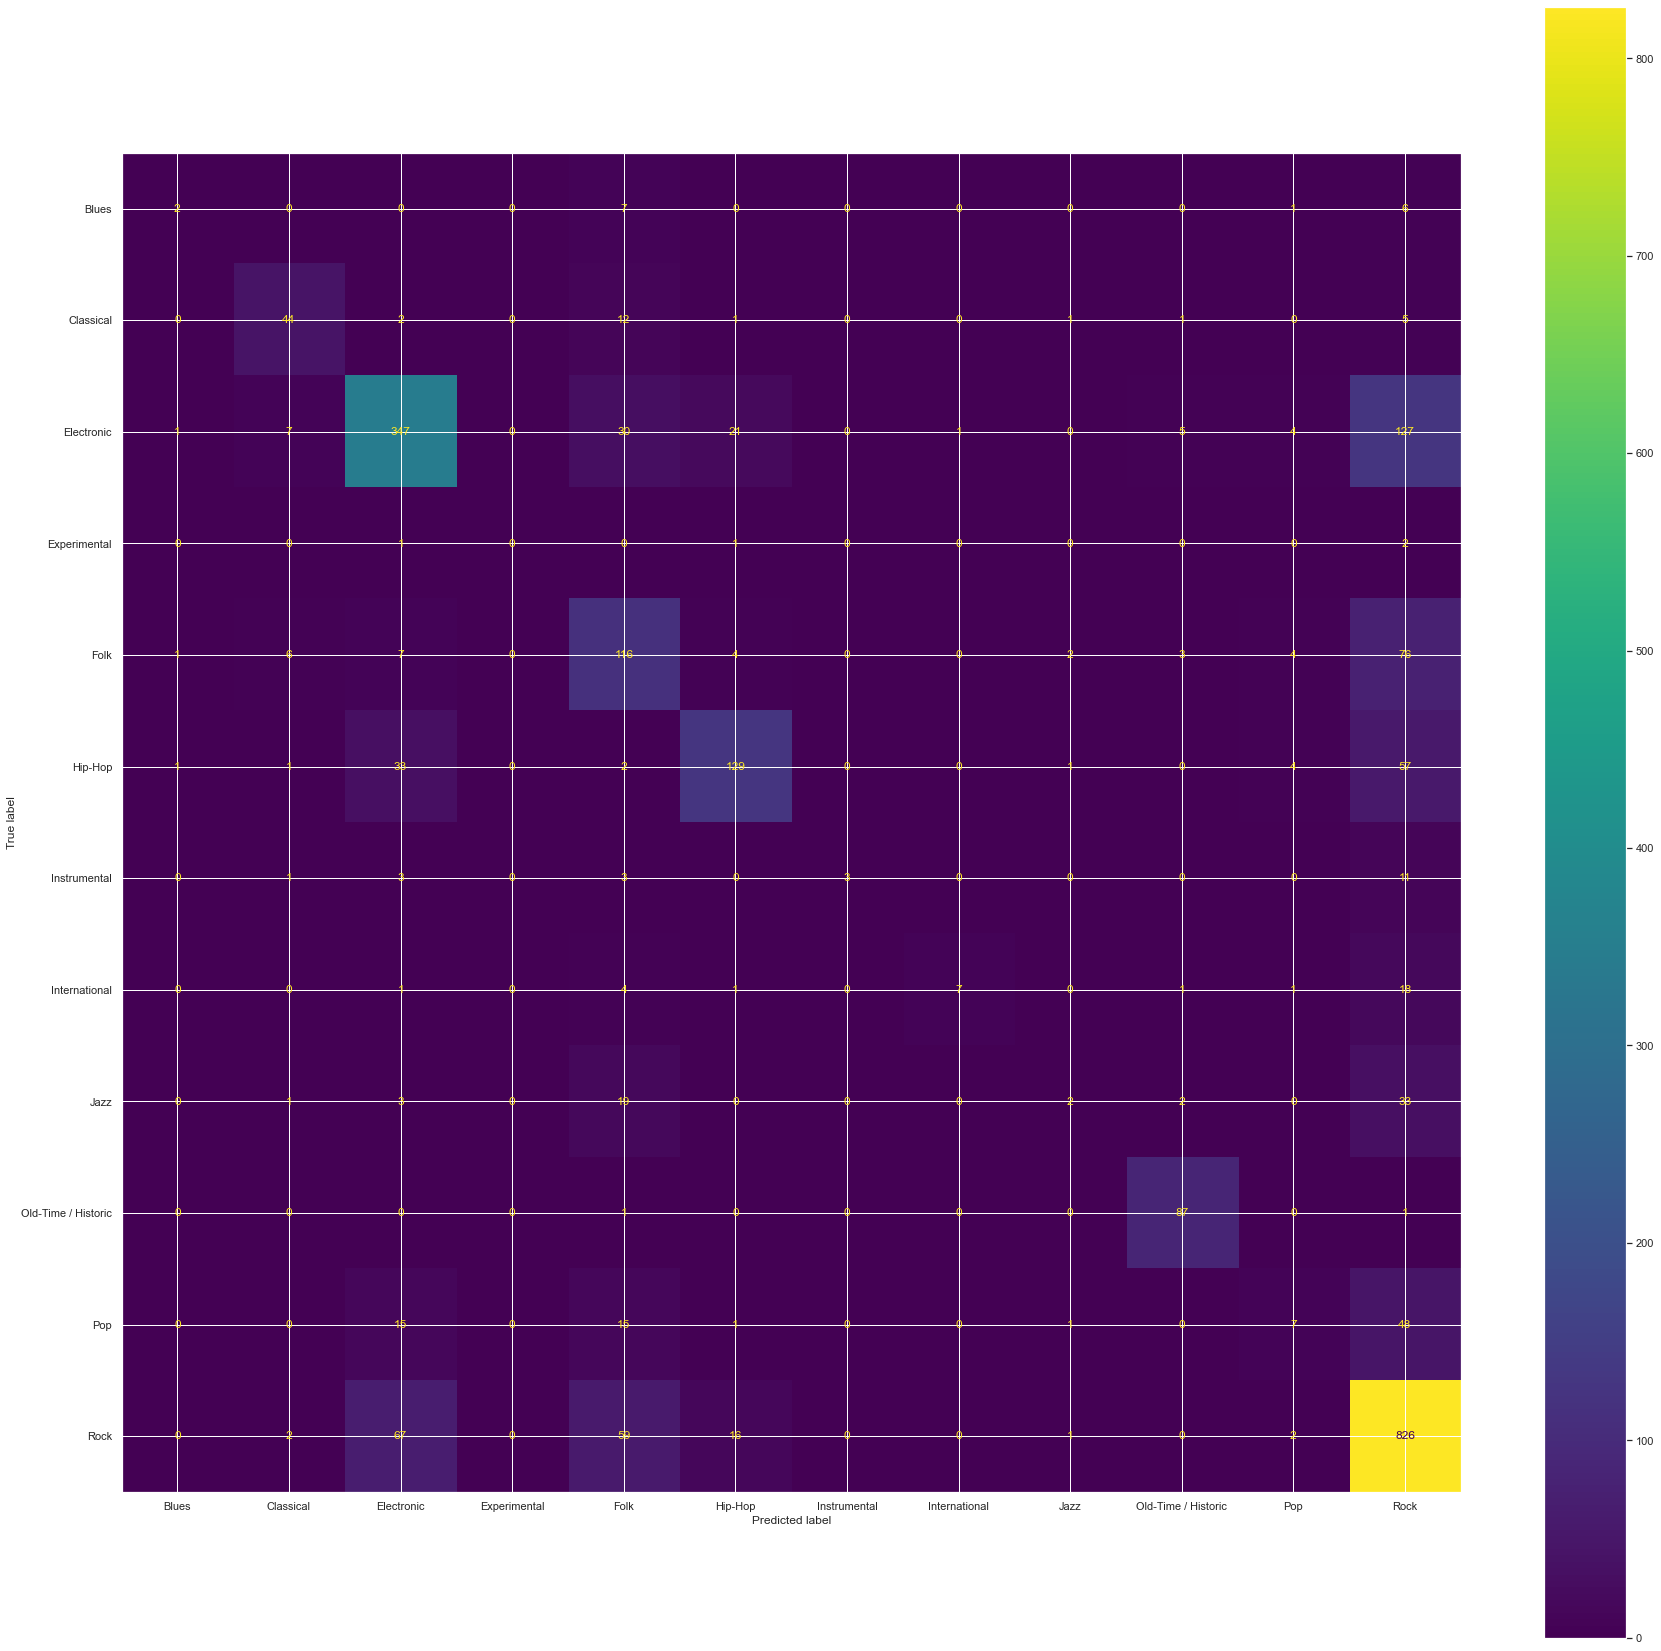

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

sns.set(rc={'figure.figsize':(30,30)})

# Graficamos la matriz de confusión
print(confusion_matrix(Y_test, y_pred))
plot_confusion_matrix(model,X_test, Y_test)

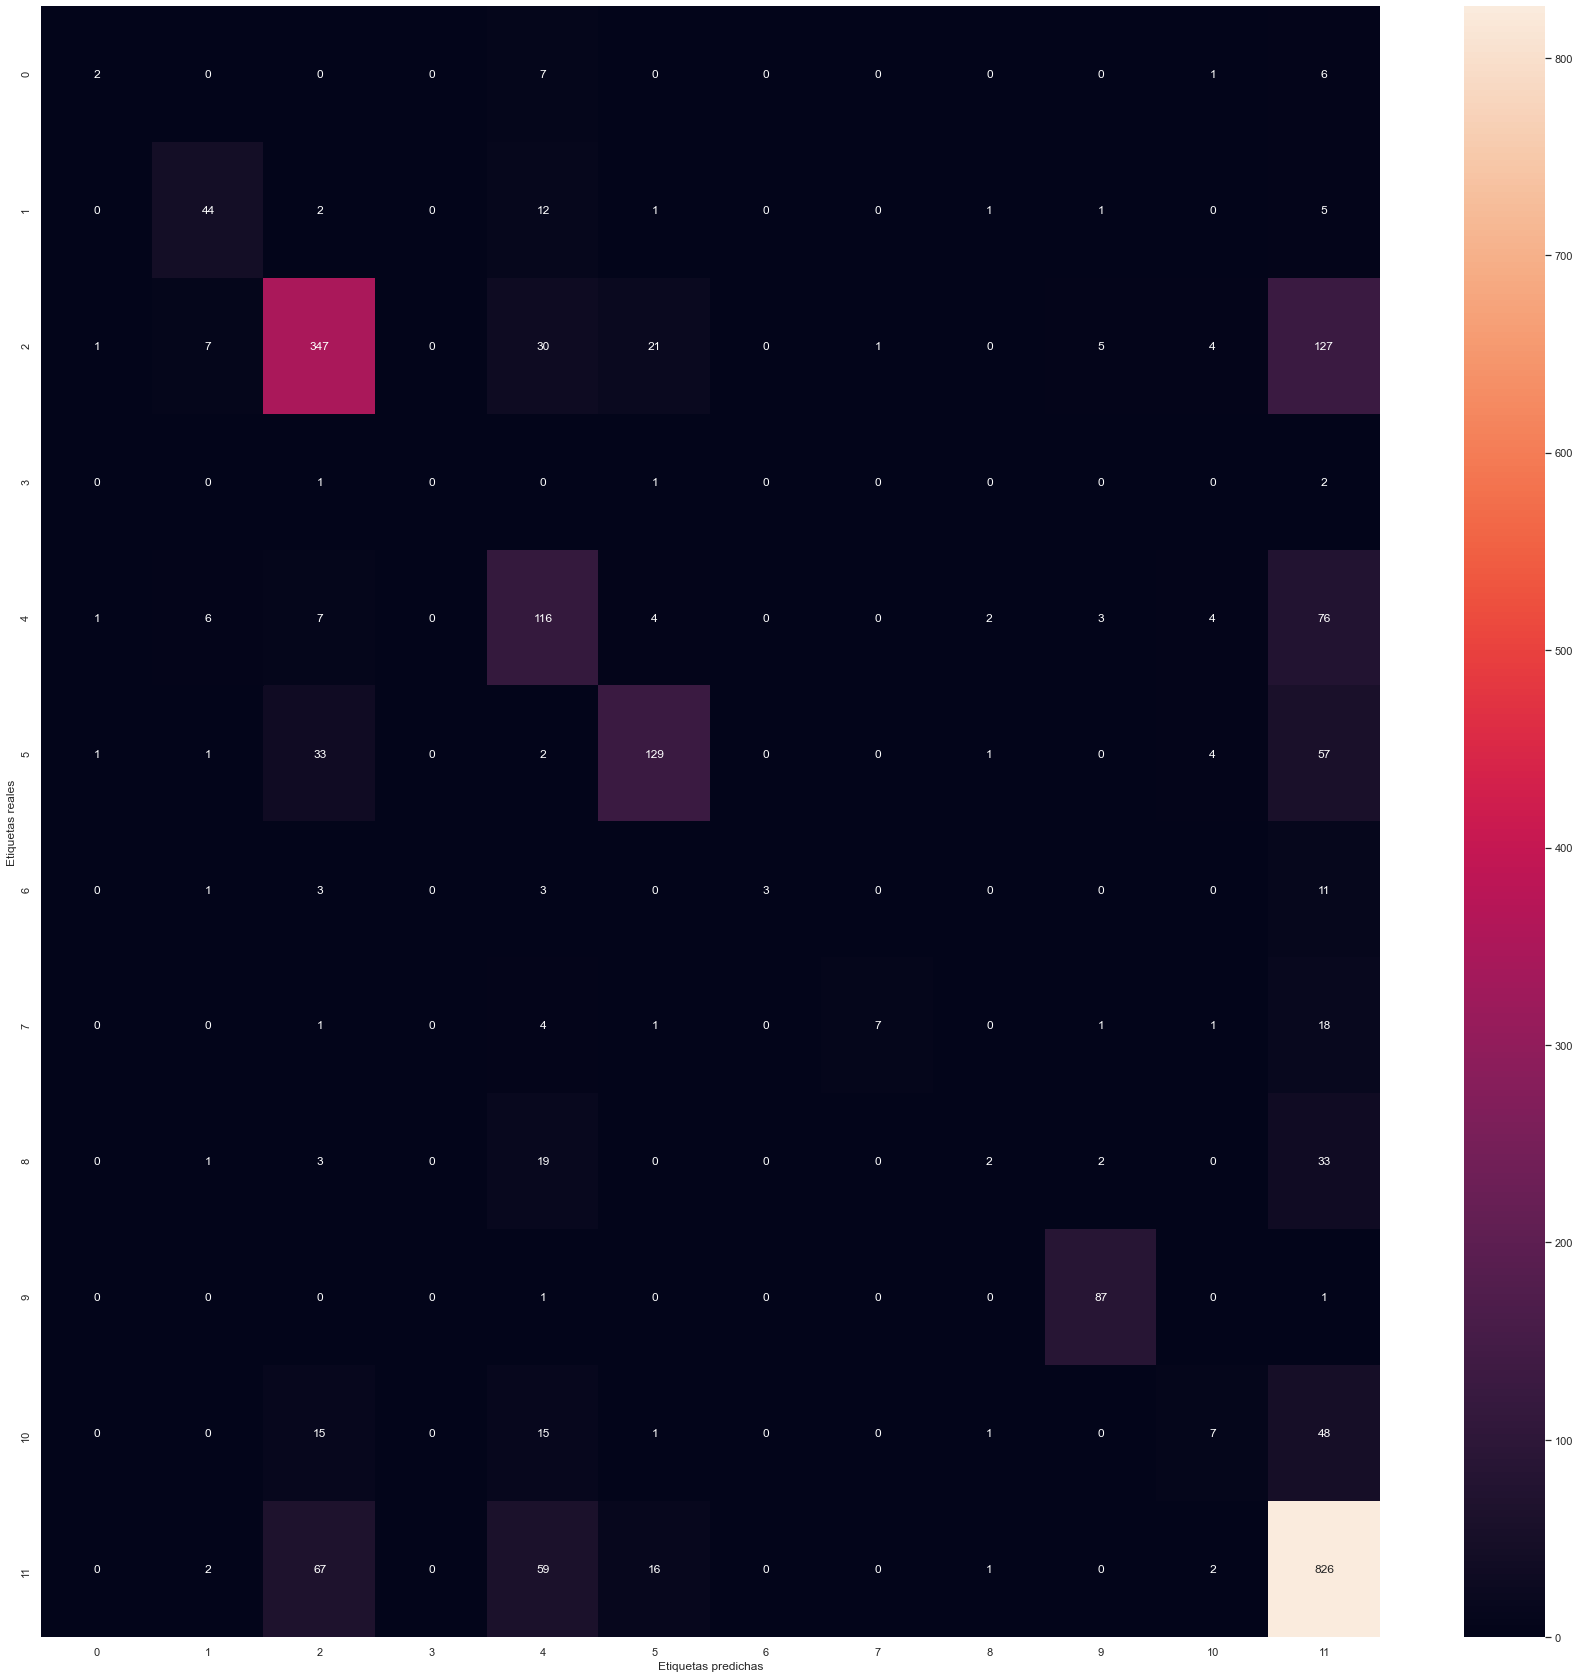

In [52]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');